<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Deep_Learning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras



In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/1_keras_fashion_mnist_neural_net/'

1_keras_fashion_mnist.ipynb  Exercise		     fmnist.png  Slide2.PNG
classlabels.JPG		     fashion_neural_net.png  Slide1.PNG


In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape # check the shape of the array

(28, 28)

In [8]:
x_train[0] # actually checking out the array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

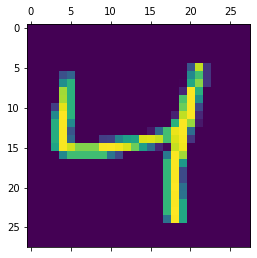

In [9]:
plt.matshow(x_train[2])

In [10]:
y_train[2]

4

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
# first we will have to flatten the dataset
x_train_flatten = x_train.reshape(len(x_train),28*28) # we are multiplying by 28 * 28 as we have the grid of 28x28 and we want all 60k images in train to get flatten

In [13]:
x_train_flatten.shape

(60000, 784)

In [14]:
# first we will have to flatten the dataset
x_test_flatten = x_test.reshape(len(x_test),28*28) # we are multiplying by 28 * 28 as we have the grid of 28x28 and we want all 10k images in test to get flatten

In [15]:
x_test_flatten.shape

(10000, 784)

In [16]:
model = keras.Sequential([ keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')]) # simple neural network with no hidden layer

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

In [18]:
model.fit(x_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4710 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3045 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2837 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2735 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2669 - accuracy: 0.9254


In [19]:
model.evaluate(x_test_flatten, y_test) # checking accuracy on the test dataset

313/313 [==============================] - 1s 1ms/step - loss: 0.2693 - accuracy: 0.9255


[0.2693045735359192, 0.9254999756813049]

In [20]:
np.argmax(model.predict(x_test_flatten[[100]]).round(2)) # np.argmax is used for getting the maximum value in the array, 
                                                       #round is used to round up to 2 decimal points 

6

In [21]:
y_test[100]

6

In [22]:
y_predicted = model.predict(x_test_flatten)

In [23]:
y_pred= [np.argmax(i) for i in y_predicted]

In [24]:
y_pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    3,    2,    0,    4,    7,    3,    3,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    7,  943,   13,    6,    2,    9,    9,   37,    3],
       [   2,    0,   25,  920,    0,   19,    2,   10,   25,    7],
       [   1,    1,   12,    1,  900,    0,    8,    4,   12,   43],
       [   9,    3,    9,   35,    7,  763,   11,    8,   40,    7],
       [  11,    3,   13,    1,    7,   12,  904,    2,    5,    0],
       [   1,    7,   31,    5,    4,    1,    0,  947,    4,   28],
       [   4,    7,    9,   18,    8,   15,    9,    9,  889,    6],
       [   7,    7,    3,   10,   19,    5,    0,   26,   13,  919]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual')

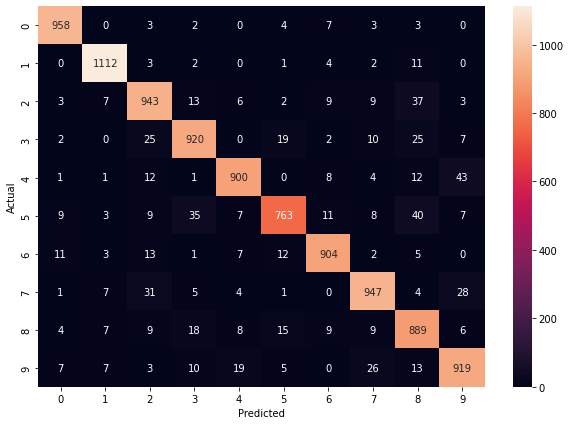

In [26]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [27]:
model = keras.Sequential([ keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
                           keras.layers.Dense(10,  activation = 'sigmoid')       
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train_flatten,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2757 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9831


In [28]:
model.evaluate(x_test_flatten, y_test) # checking accuracy on the test dataset

313/313 [==============================] - 1s 1ms/step - loss: 0.0708 - accuracy: 0.9763


[0.07081446051597595, 0.9763000011444092]

In [29]:
y_predicted = model.predict(x_test_flatten)
y_pred= [np.argmax(i) for i in y_predicted]

Text(69.0, 0.5, 'Actual')

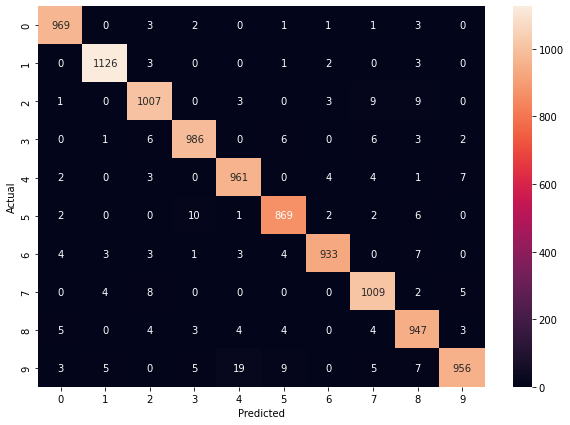

In [30]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred )
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ***For Using the flatten function in keras instead of manually flatting the images***

In [38]:
model = keras.Sequential([ keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(100, activation = 'relu'),
                           keras.layers.Dense(10,  activation = 'sigmoid')       
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2665 - accuracy: 0.9179
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1245 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0955 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0779 - accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0659 - accuracy: 0.9804


In exercise please try different optimizers and loss functions


In [32]:
model = keras.Sequential([ keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(100, activation = 'relu'),
                           keras.layers.Dense(10,  activation = 'sigmoid')       
])
model.compile(optimizer='Adadelta', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train,y_train, epochs=5)
model.evaluate(x_test_flatten, y_test) # checking accuracy on the test dataset

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3224 - accuracy: 0.1309
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1563 - accuracy: 0.2182
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0110 - accuracy: 0.3496
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8782 - accuracy: 0.4881
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 1.6862 - accuracy: 0.6295


[1.6862396001815796, 0.6294999718666077]

In [33]:
model = keras.Sequential([ keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(100, activation = 'relu'),
                           keras.layers.Dense(10,  activation = 'sigmoid')       
])
model.compile(optimizer='Adagrad', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train,y_train, epochs=5)
model.evaluate(x_test_flatten, y_test) # checking accuracy on the test dataset

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2435 - accuracy: 0.7199
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6445 - accuracy: 0.8535
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5207 - accuracy: 0.8729
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4629 - accuracy: 0.8825
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3941 - accuracy: 0.9010


[0.39407598972320557, 0.9010000228881836]

In [34]:
model = keras.Sequential([ keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(100, activation = 'relu'),
                           keras.layers.Dense(10,  activation = 'sigmoid')       
])
model.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train,y_train, epochs=5)
model.evaluate(x_test_flatten, y_test) # checking accuracy on the test dataset

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3822 - accuracy: 0.8972
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2122 - accuracy: 0.9412
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1677 - accuracy: 0.9530
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1410 - accuracy: 0.9604
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.1207 - accuracy: 0.9649


[0.12071296572685242, 0.964900016784668]

In [35]:
model = keras.Sequential([ keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(100, activation = 'relu'),
                           keras.layers.Dense(10,  activation = 'sigmoid')       
])
model.compile(optimizer='Ftrl', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train,y_train, epochs=5)
model.evaluate(x_test_flatten, y_test) # checking accuracy on the test dataset

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3008 - accuracy: 0.1526
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2363 - accuracy: 0.2310
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8896 - accuracy: 0.4899
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3799 - accuracy: 0.6560
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.9662 - accuracy: 0.7394


[0.9661837816238403, 0.7394000291824341]

In [36]:
model = keras.Sequential([ keras.layers.Flatten(input_shape = (28,28)),
                           keras.layers.Dense(100, activation = 'relu'),
                           keras.layers.Dense(10,  activation = 'sigmoid')       
])
model.compile(optimizer='RMSProp', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train,y_train, epochs=5)
model.evaluate(x_test_flatten, y_test) # checking accuracy on the test dataset

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2682 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1312 - accuracy: 0.9613
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0980 - accuracy: 0.9720
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0807 - accuracy: 0.9771
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0900 - accuracy: 0.9742


[0.08999757468700409, 0.9742000102996826]